Creates a graphical comparison of cant alignments from IFC-Rail-Unit-Test-Reference-Code and IfcOpenShell

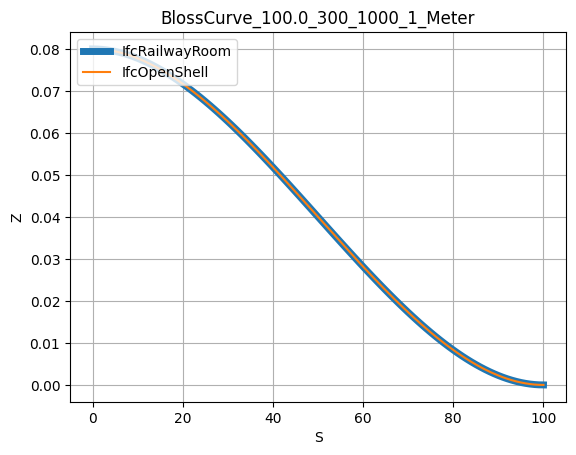

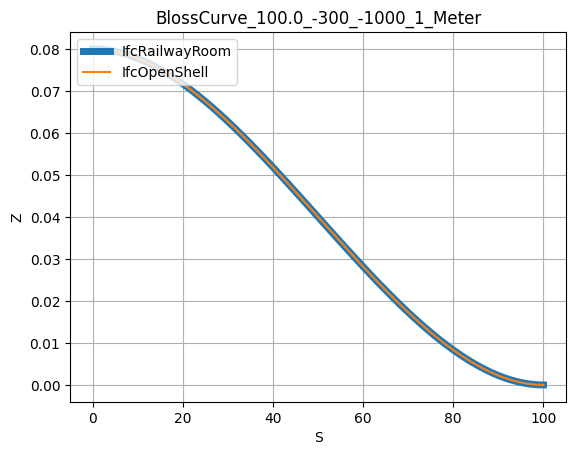

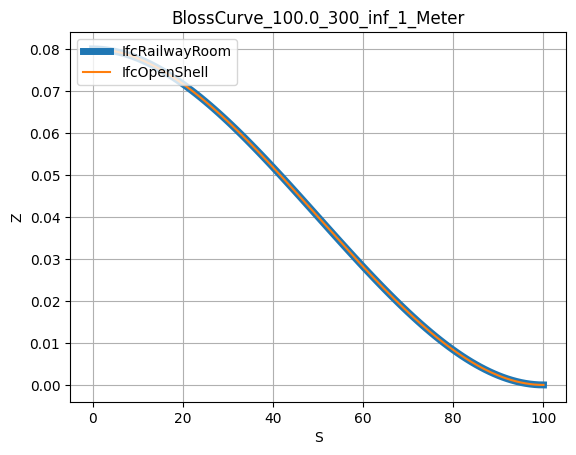

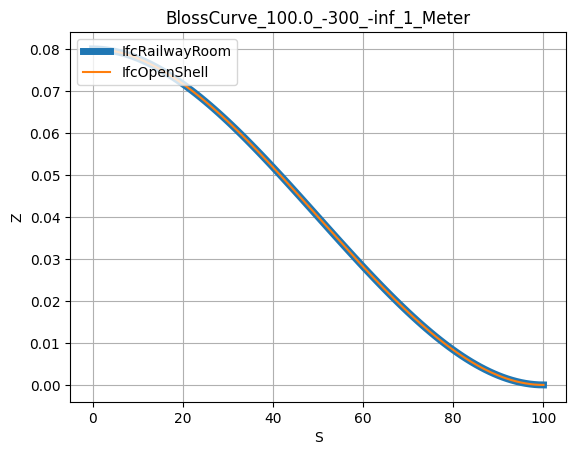

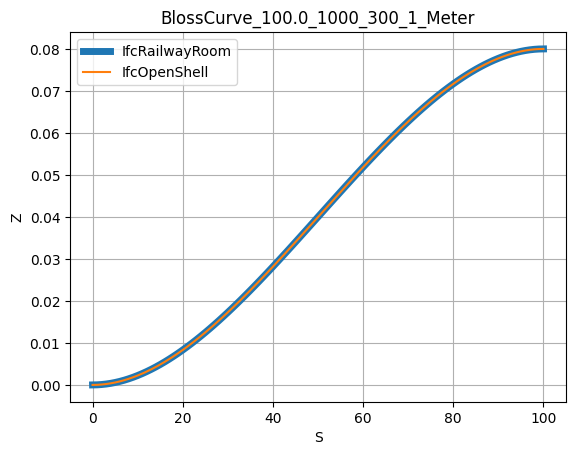

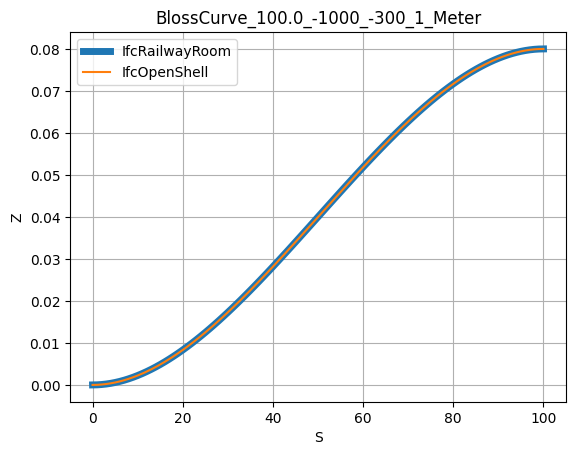

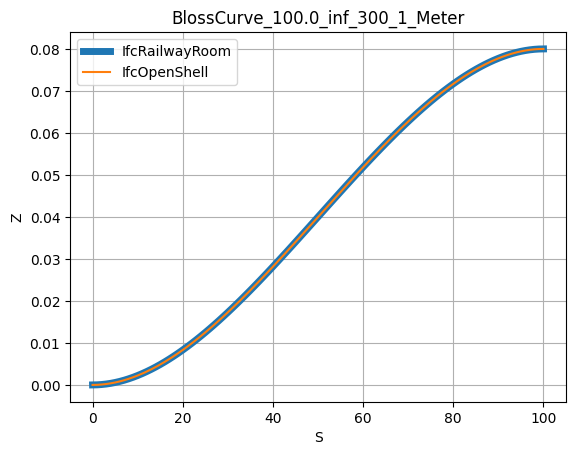

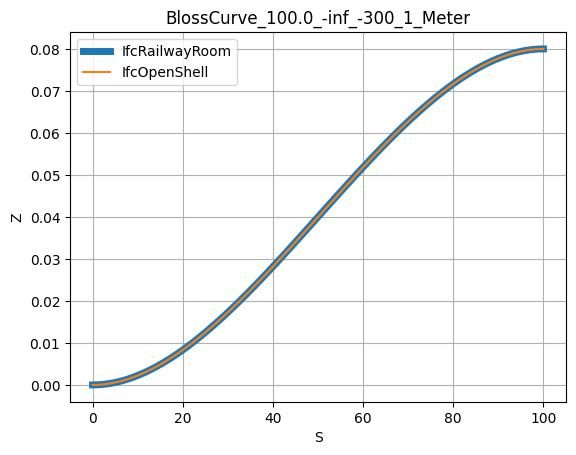

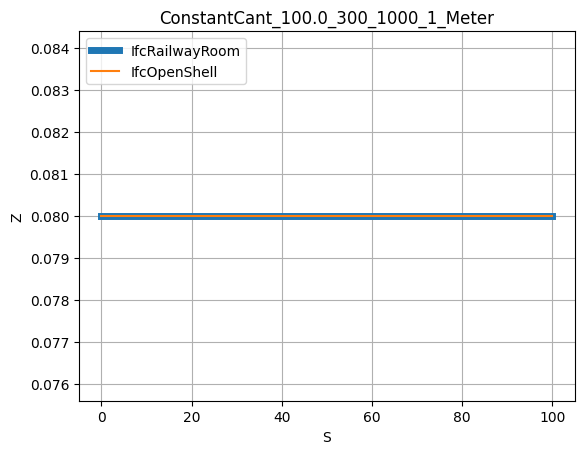

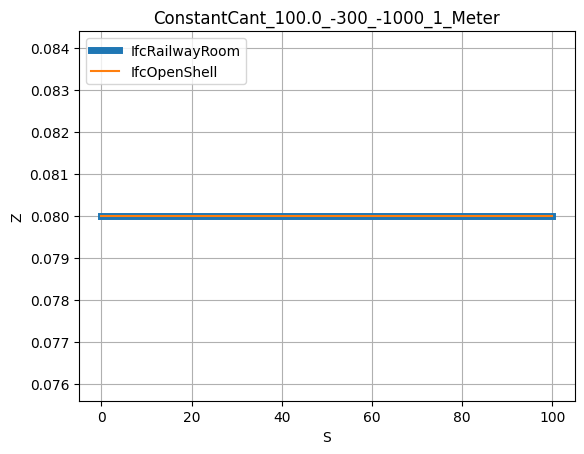

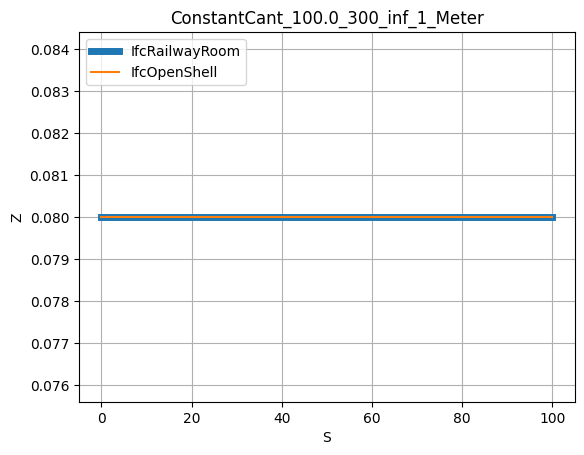

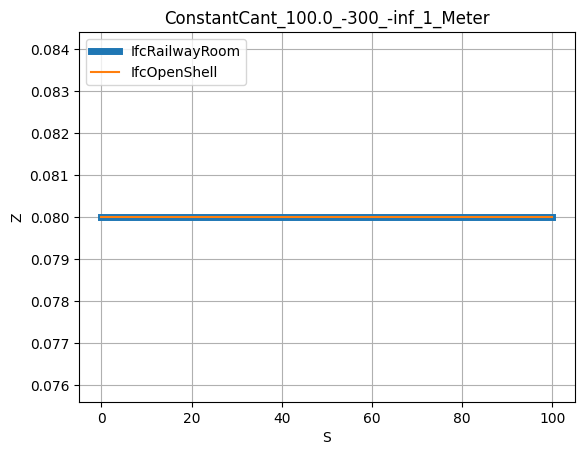

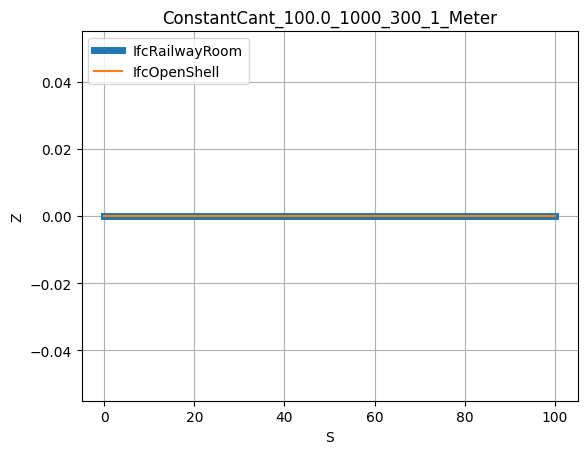

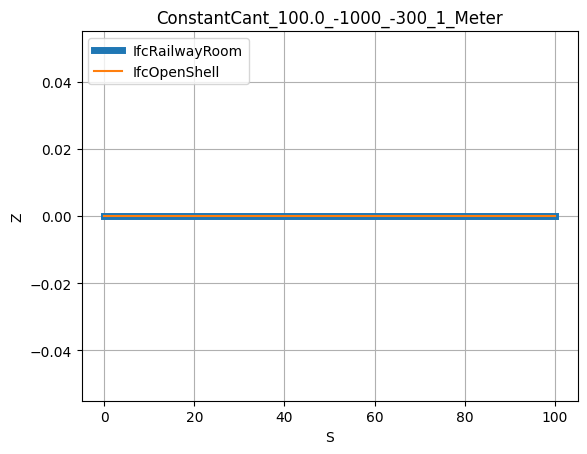

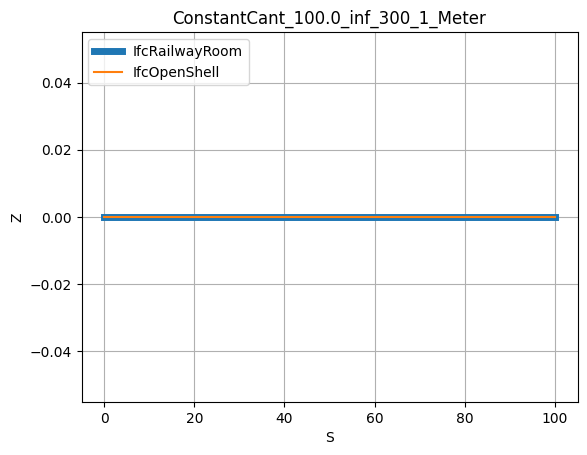

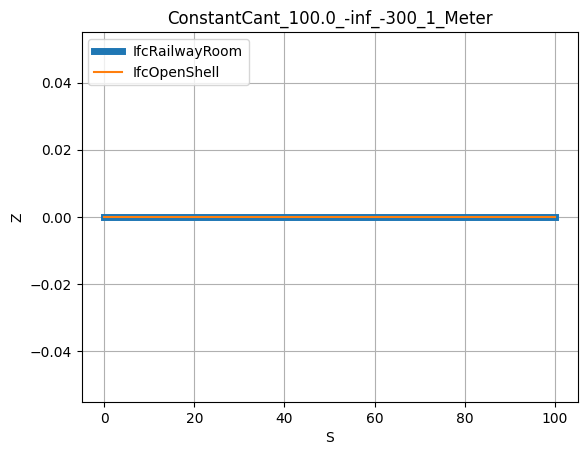

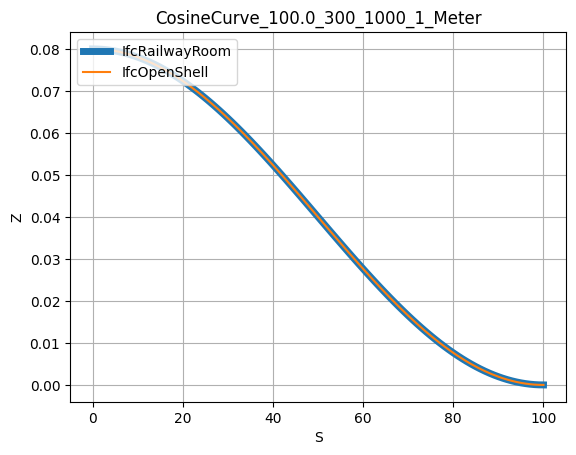

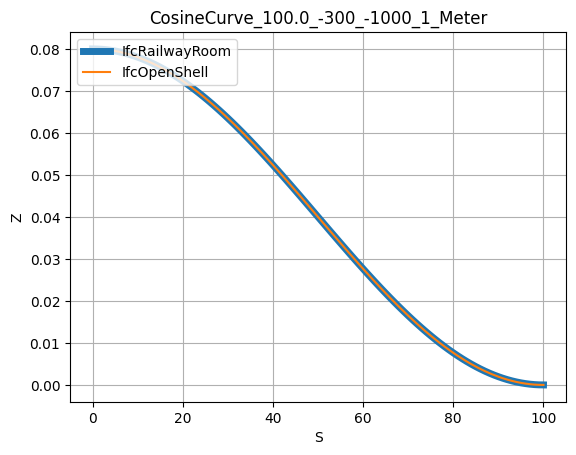

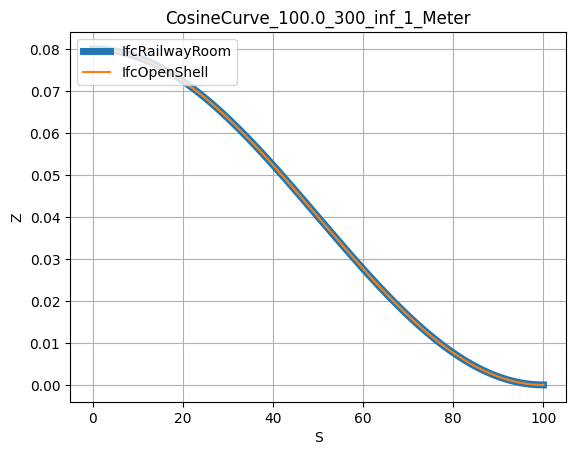

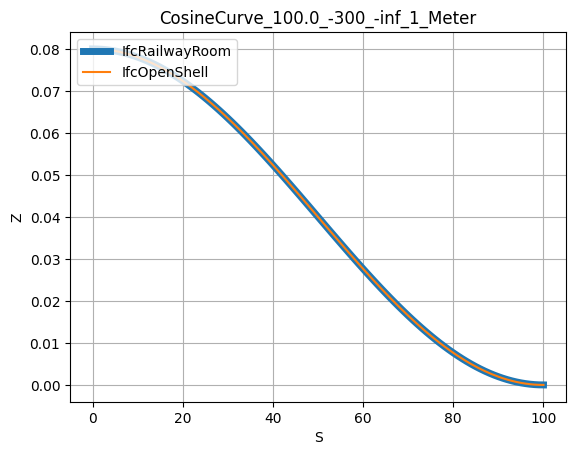

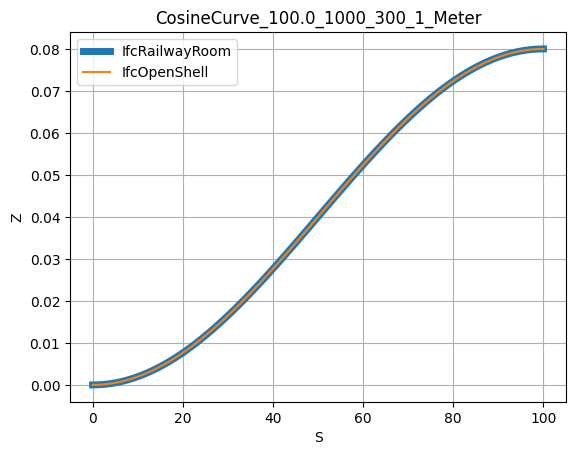

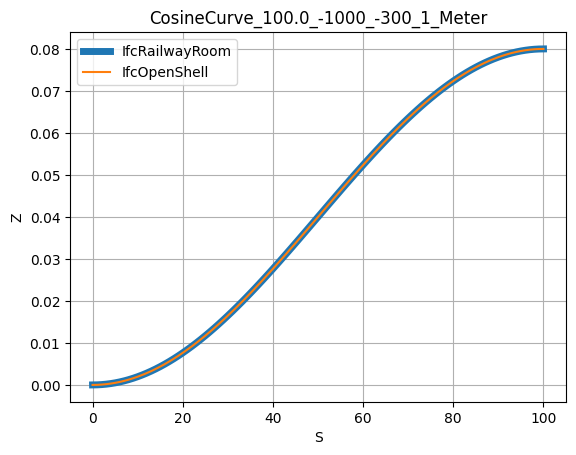

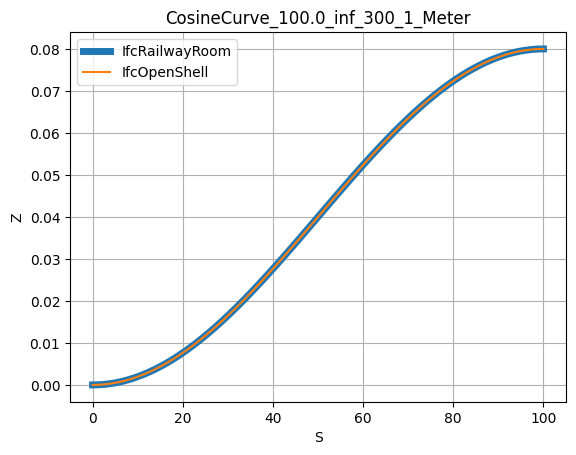

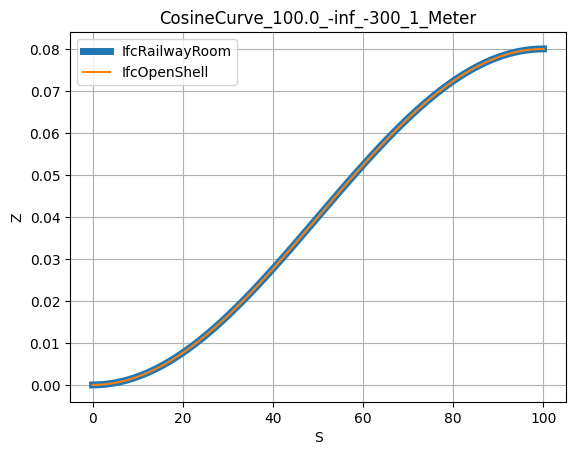

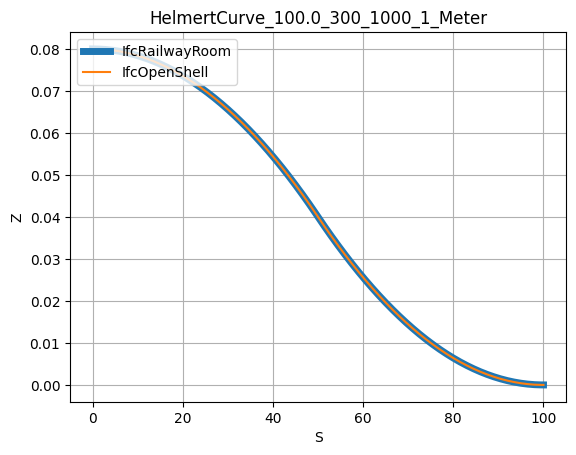

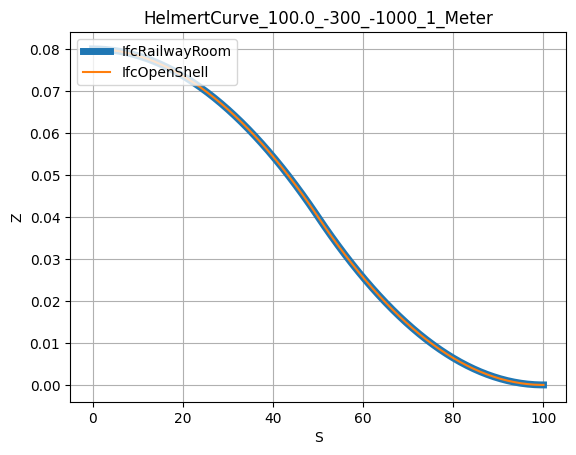

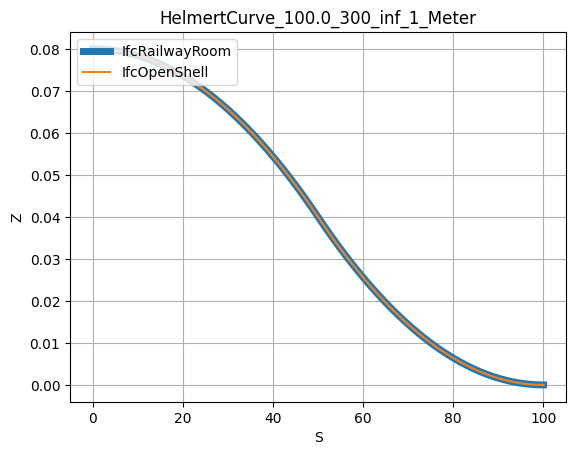

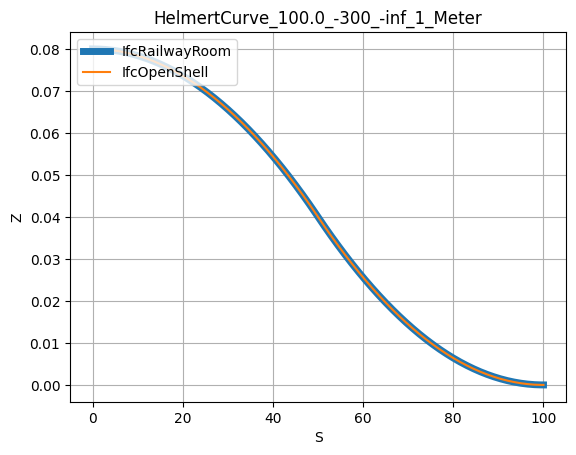

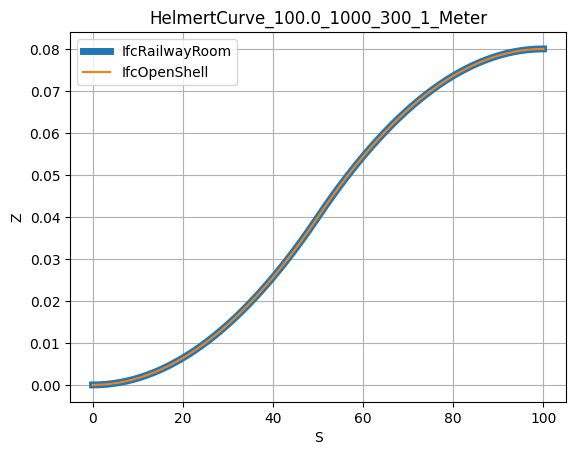

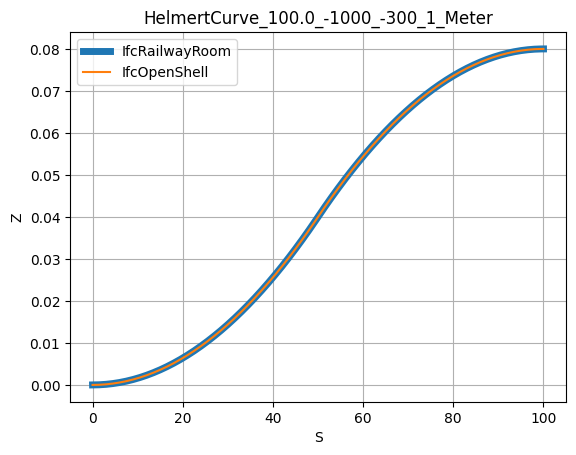

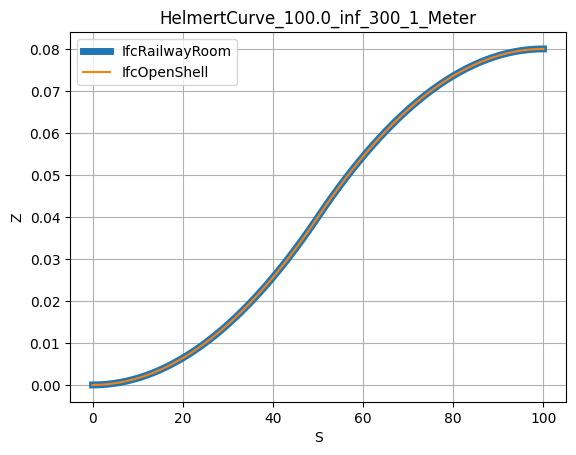

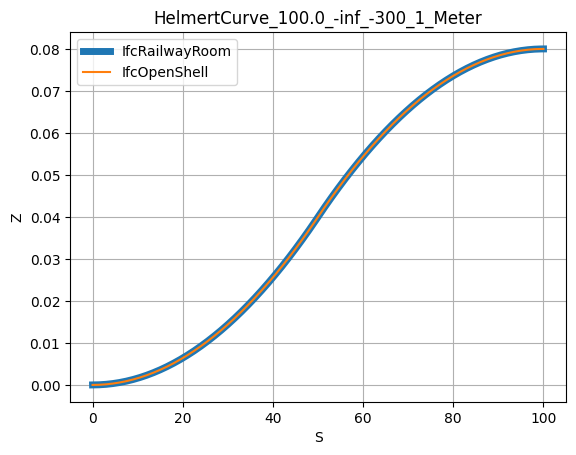

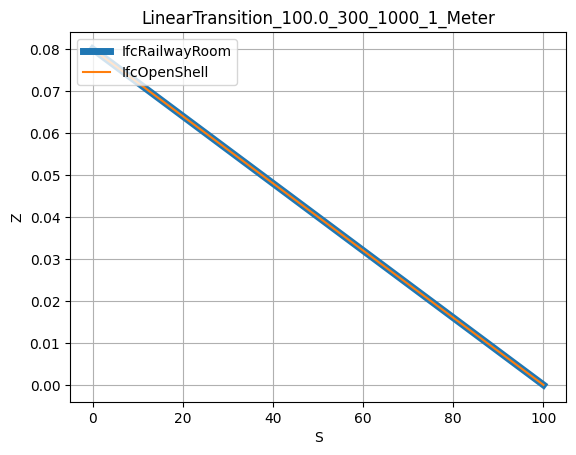

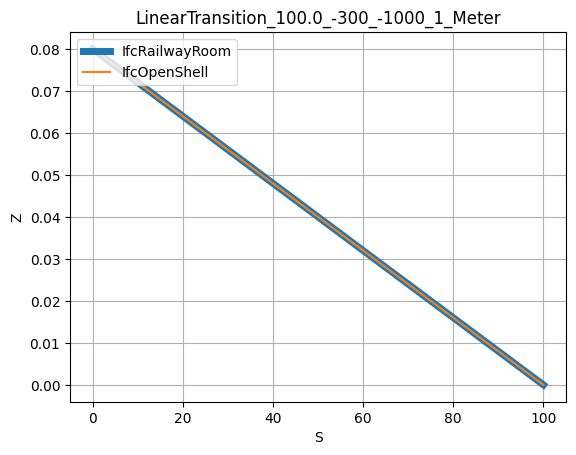

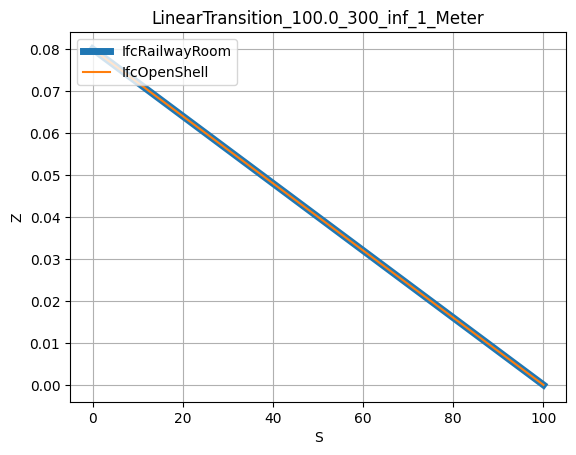

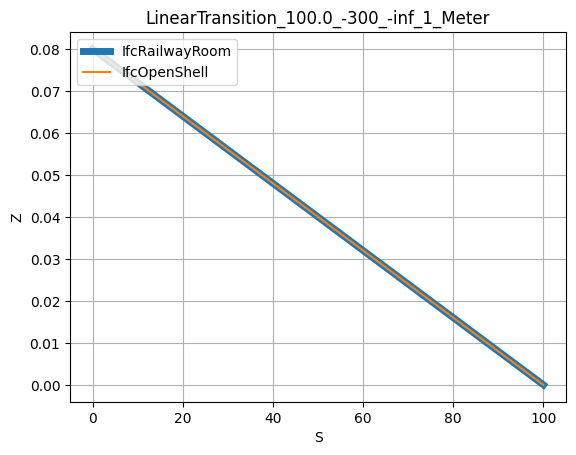

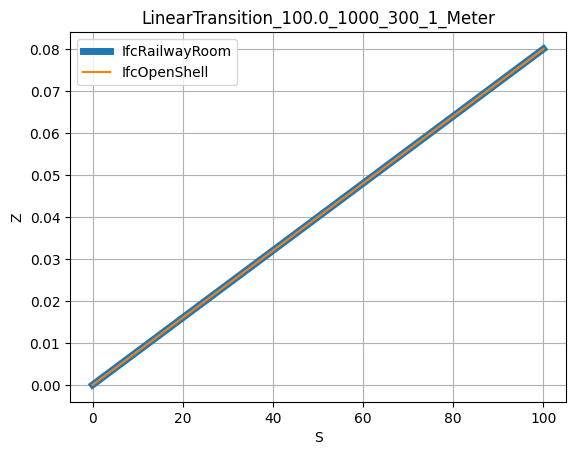

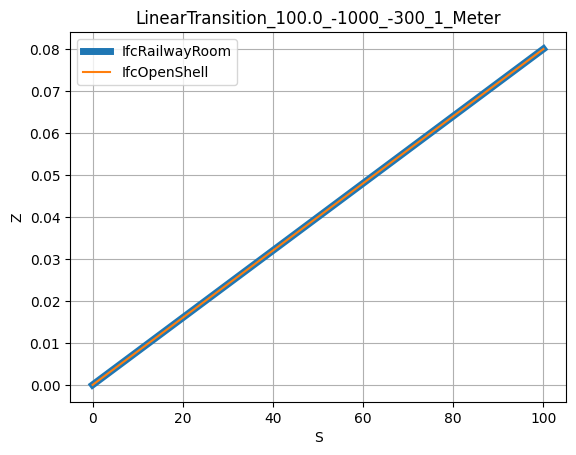

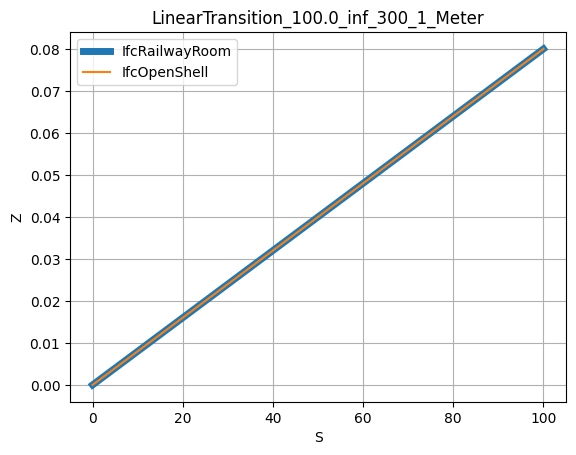

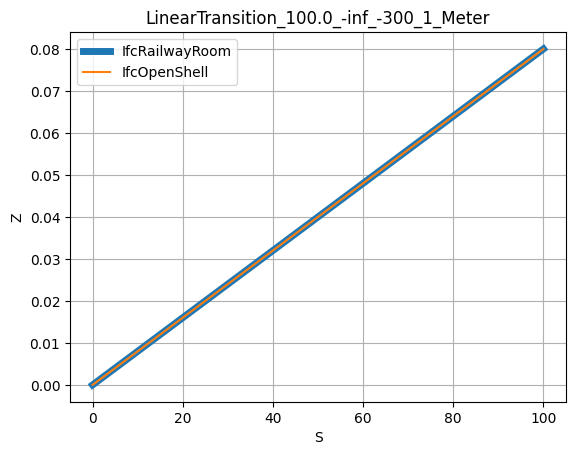

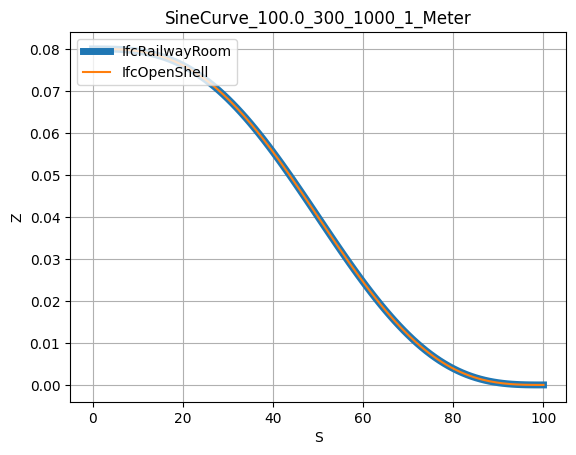

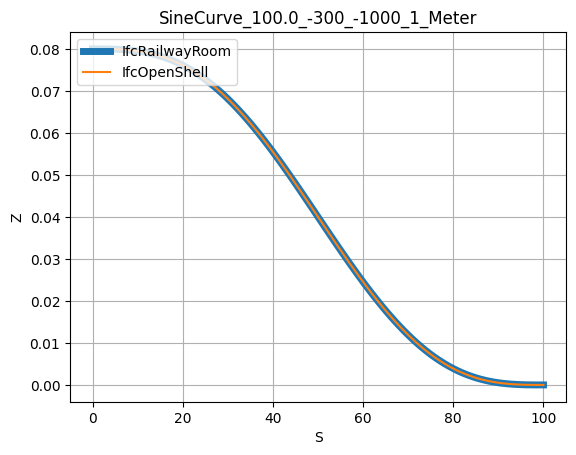

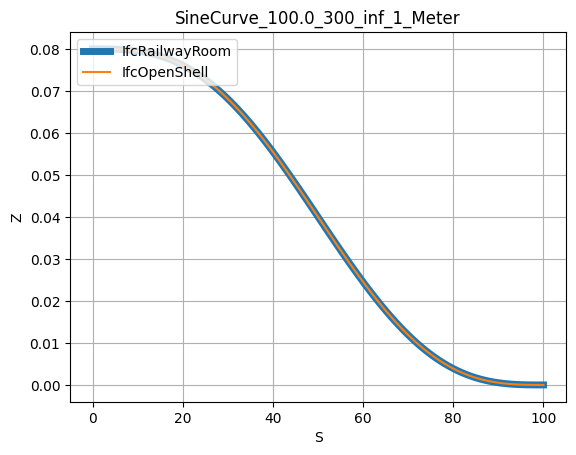

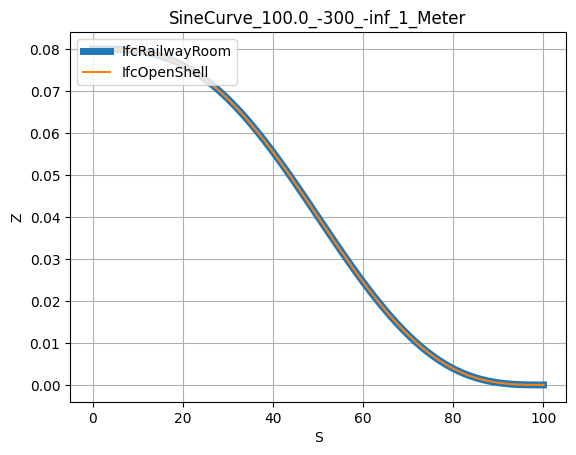

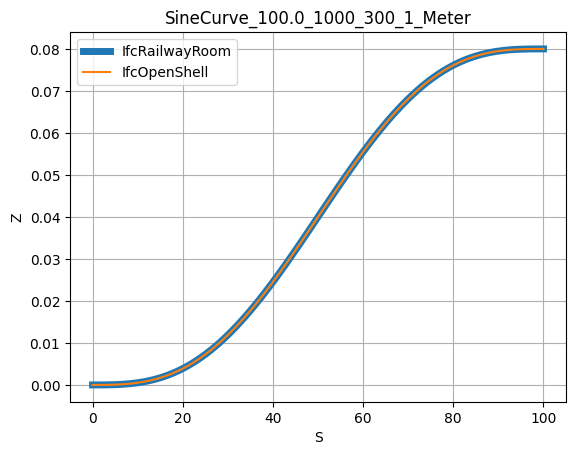

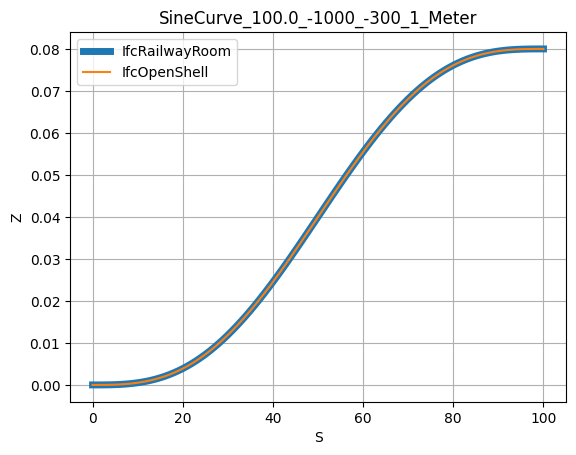

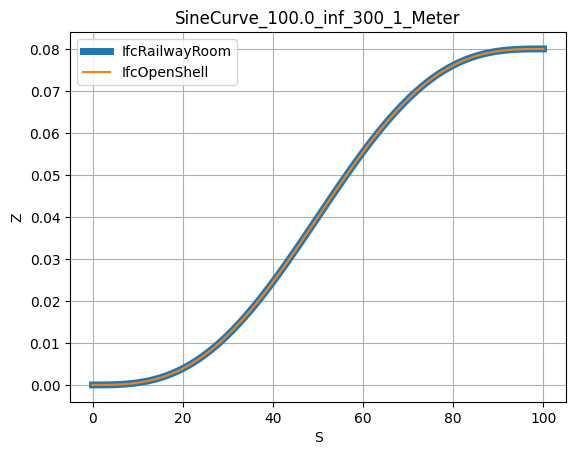

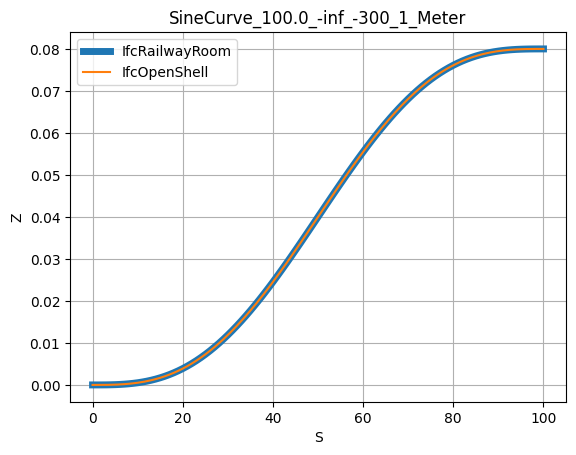

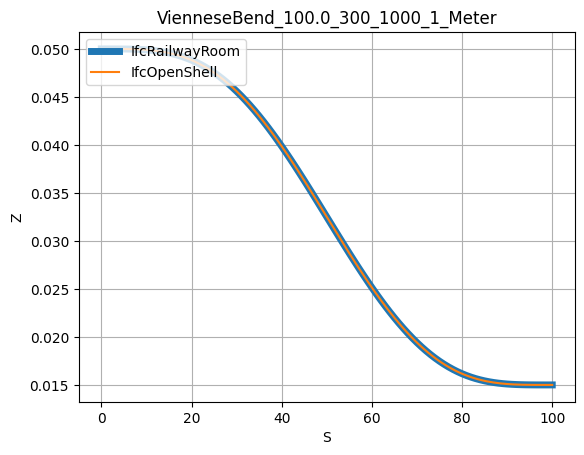

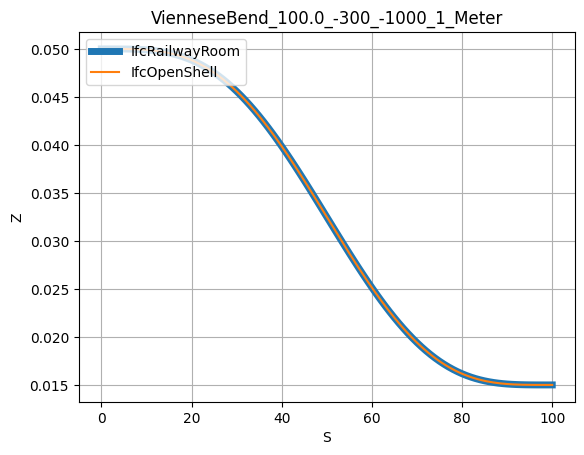

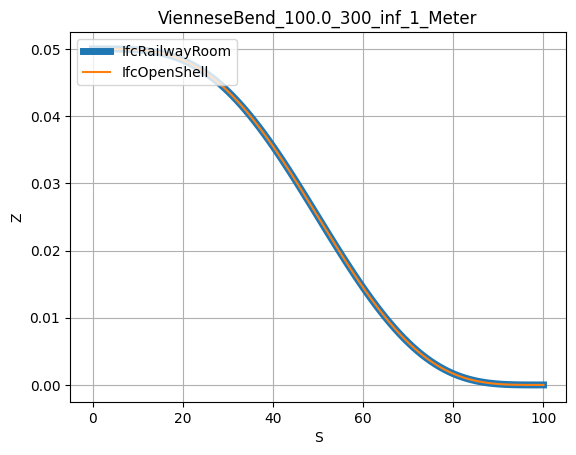

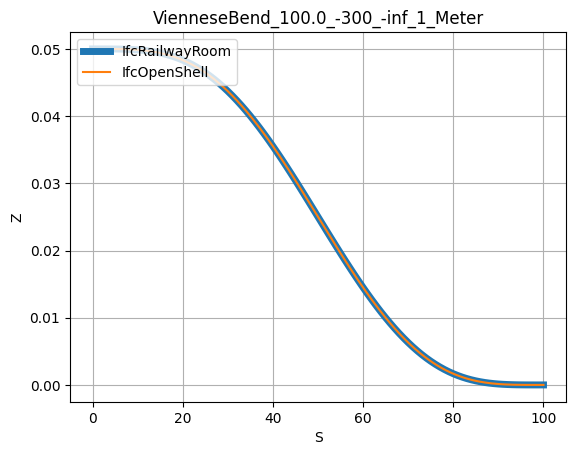

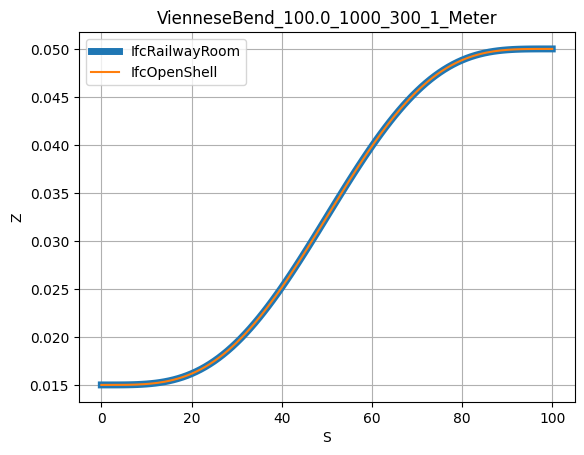

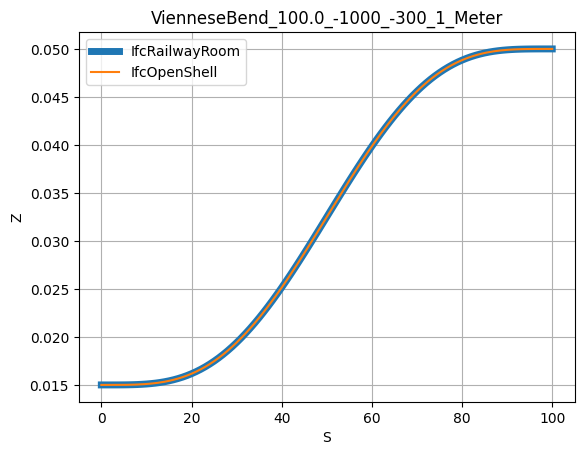

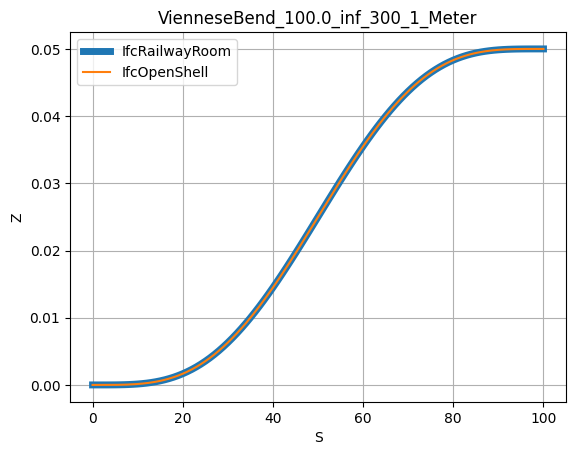

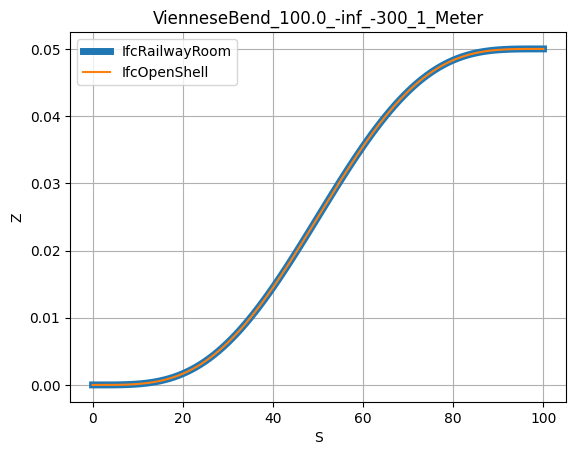

In [1]:
import ifcopenshell
import ifcopenshell.geom as geom
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

curve_types = ["BlossCurve","ConstantCant","CosineCurve","HelmertCurve","LinearTransition","SineCurve","VienneseBend"]
for curve_type in curve_types:
    test_cases = []
    test_cases.append(curve_type + "_100.0_300_1000_1_Meter")
    test_cases.append(curve_type + "_100.0_-300_-1000_1_Meter")
    test_cases.append(curve_type + "_100.0_300_inf_1_Meter")
    test_cases.append(curve_type + "_100.0_-300_-inf_1_Meter")
    test_cases.append(curve_type + "_100.0_1000_300_1_Meter")
    test_cases.append(curve_type + "_100.0_-1000_-300_1_Meter")
    test_cases.append(curve_type + "_100.0_inf_300_1_Meter")
    test_cases.append(curve_type + "_100.0_-inf_-300_1_Meter")
    
    for test_case in test_cases:
        model = ifcopenshell.open("F:/IFC-Rail-Unit-Test-Reference-Code/alignment_testset/IFC-WithGeneratedGeometry/GENERATED__CantAlignment_" + test_case + ".ifc")
        results_file = "F:/IFC-Rail-Unit-Test-Reference-Code/alignment_testset/ToolboxProcess-C/CantAlignment/" + curve_type + "/" + test_case + "-2CS.txt"
        with open(results_file,'r') as f:
            lines = f.readlines()[2:] # skip the first two header lines
        
        x_values = []
        y_values = []
        for line in lines:
            s,x,y,z = map(float,line.split()[:4])
            d = line.split()[4]
            d = float(d.strip("()"))
            x_values.append(d)
            y_values.append(z)
        
        fig1 = plt.figure().add_subplot()
        fig1.plot(x_values,y_values,label="IfcRailwayRoom",linewidth=5)
    
        curves = model.by_type("IfcSegmentedReferenceCurve",False)
       
        settings = geom.settings()
        
        
        for curve in curves:
            shape = geom.create_shape(settings,curve)
            verts = shape.verts
            verts = np.array(verts).reshape((-1,3))
            x,y,z = verts.T
            # want to plot (dist along, elevation) so need to compute
            # dist along from x,y. the following is probably bad code,
            # I just used Microsoft Copilot to generate it
            # Convert to Numpy arrays
            points = np.array(list(zip(x, y)))
            # Calculate pairwise distances using the Euclidean distance formula
            distances = []
            distances.append(0.0)
            for i in range(len(points)-1):
                dist = euclidean_distance(points[i], points[i+1])
                distances.append(dist + distances[i])
                
        fig1.plot(distances,z,label="IfcOpenShell")
            
        fig1.set_title(test_case)
        fig1.legend(loc="upper left")
        #fig1.axis("square")
        fig1.set_xlabel("S")
        fig1.set_ylabel("Z")
        fig1.grid(True)
        plt.show()
